In [1]:
import torch
from markov_bridges.configs.config_classes.generative_models.cmb_config import CMBConfig
from markov_bridges.models.networks.temporal.mixed.mixed_networks_utils import load_mixed_network

from markov_bridges.data.categorical_samples import IndependentMixDataloader
from markov_bridges.configs.config_classes.data.basics_configs import IndependentMixConfig

from markov_bridges.utils.experiment_files import ExperimentFiles

from markov_bridges.models.generative_models.cmb import CMB
from markov_bridges.models.generative_models.cmb_forward import MixedForwardMap
from markov_bridges.models.pipelines.samplers.mixed_tau_diffusion import TauDiffusion
from markov_bridges.models.pipelines.pipeline_cmb import CMBPipeline

from markov_bridges.data.utils import sample_discrete_target
from markov_bridges.utils.counts import categorical_counts_per_path
from markov_bridges.utils.plots.histograms_plots import (
    plot_time_series_histograms,
    plot_histograms_one_time
)

from matplotlib import pyplot as plt

In [2]:
#experiment_dir = r"C:\Users\cesar\Desktop\Projects\DiffusiveGenerativeModelling\OurCodes\markov_bridges\results\cmb\independent\1720120810"
experiment_dir = r"C:\Users\cesar\Desktop\Projects\DiffusiveGenerativeModelling\OurCodes\markov_bridges\results\cmb\independent\1720167030"
experiment_dir = r"C:\Users\cesar\Desktop\Projects\DiffusiveGenerativeModelling\OurCodes\markov_bridges\results\cmb\independent\1720167880"

In [7]:
cmb = CMB(experiment_dir=experiment_dir)
dataloader = cmb.dataloader
pipeline = cmb.pipeline
pipeline.tau_diffusion_sampler.num_intermediates = None
pipeline.tau_diffusion_sampler.num_steps = 1000

c:\Users\cesar\anaconda4\envs\rate_matching\lib\site-packages\torch\nn\init.py:412: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


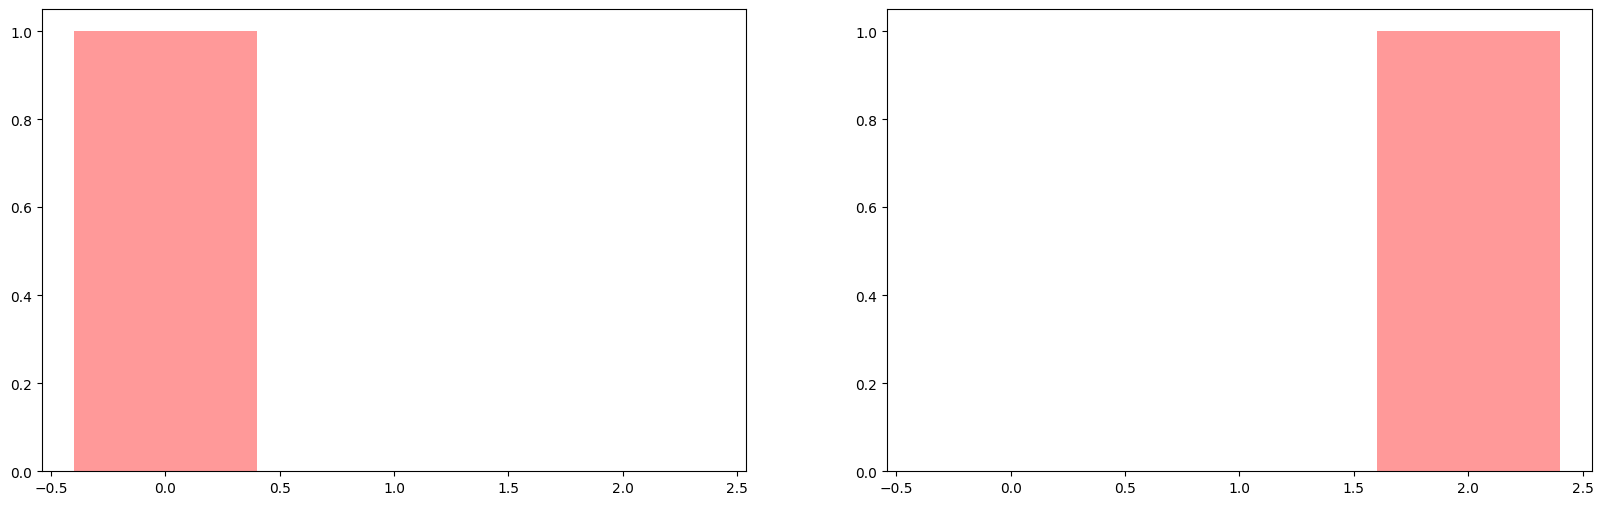

In [4]:
number_of_batches = 20
data_sample = sample_discrete_target(dataloader,train=True,number_of_batches=number_of_batches)
sample_histogram = categorical_counts_per_path(data_sample,vocab_size=cmb.config.data.vocab_size).squeeze()
plot_histograms_one_time(sample_histogram,cmb.config.data.vocab_size)

In [8]:
paths_list = []
batch_index  = 0
for databatch in dataloader.train():
    generative_sample = pipeline.generate_sample(databatch,return_path=True)
    paths_list.append(generative_sample.discrete_paths)
    batch_index += 1
    if batch_index >= number_of_batches:
        break
paths_list = torch.cat(paths_list,dim=0)

1000it [00:01, 889.91it/s]
1000it [00:01, 814.35it/s]
1000it [00:02, 495.33it/s]
1000it [00:02, 452.27it/s]
1000it [00:02, 441.23it/s]
1000it [00:02, 425.83it/s]
1000it [00:02, 452.08it/s]
1000it [00:02, 437.80it/s]
1000it [00:02, 353.30it/s]
1000it [00:02, 483.64it/s]
1000it [00:02, 450.10it/s]
1000it [00:02, 447.23it/s]
1000it [00:02, 354.90it/s]
1000it [00:03, 329.28it/s]
1000it [00:03, 293.05it/s]
1000it [00:03, 315.35it/s]
1000it [00:02, 375.93it/s]
1000it [00:02, 364.59it/s]
1000it [00:02, 397.52it/s]
1000it [00:02, 358.79it/s]


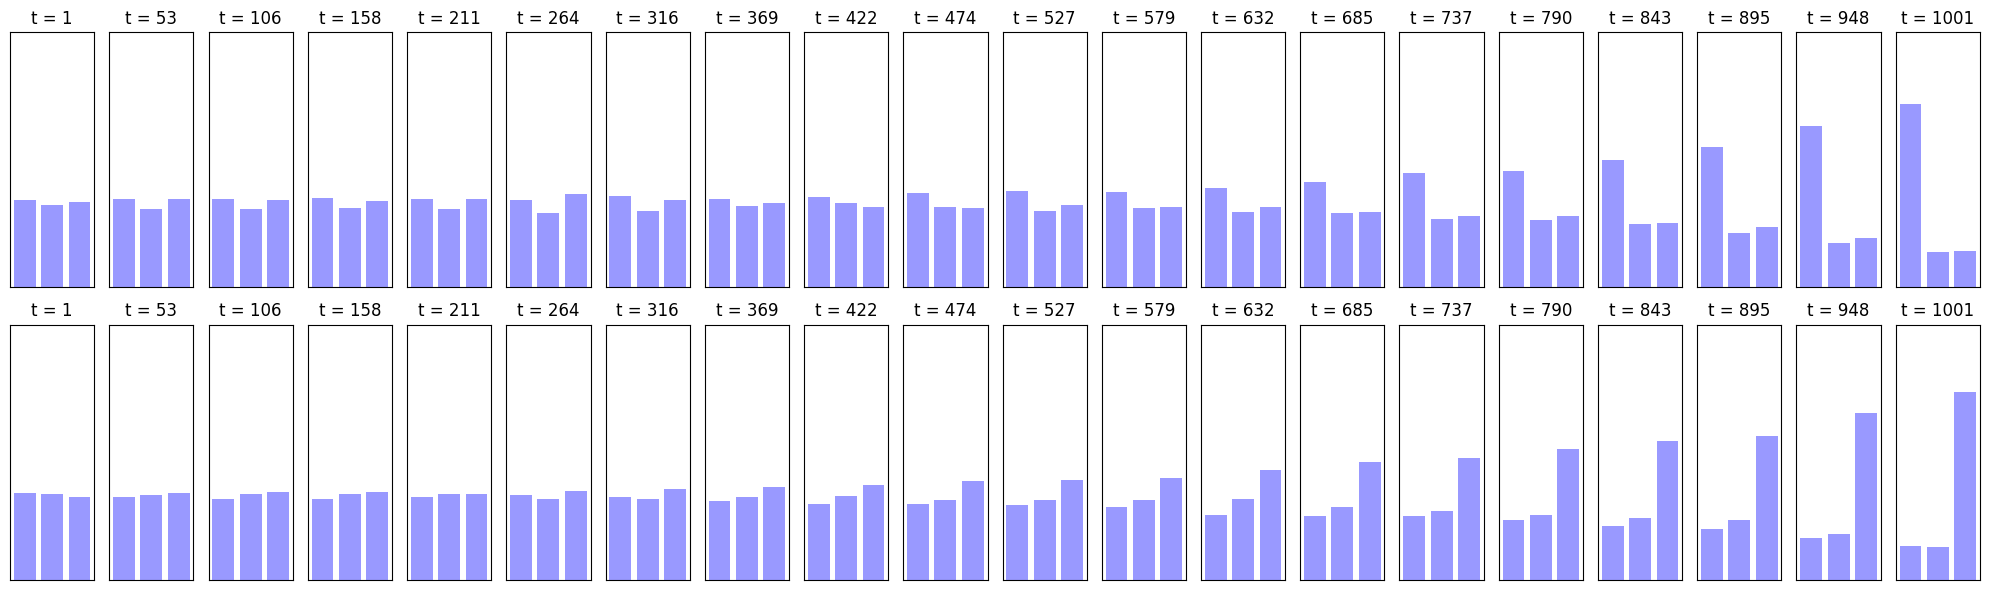

In [9]:
histograms_paths = categorical_counts_per_path(paths_list,vocab_size=cmb.config.data.vocab_size)
indices = plot_time_series_histograms(histograms_paths, None, 20)